<a href="https://colab.research.google.com/github/oli2tup/CE301/blob/main/Malaria_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.random.set_seed(1234)
import tensorflow_datasets as tfds

import keras as keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, GlobalAveragePooling2D, Activation, MaxPooling2D
from keras.layers.convolutional import Conv2D

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, img_to_array, load_img
from tensorflow.keras.layers import Resizing
from tensorflow.keras.layers import Rescaling

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools

2.7.0


In [2]:
!git clone https://github.com/oli2tup/CE301.git


Cloning into 'CE301'...
remote: Enumerating objects: 27910, done.
remote: Total 27910 (delta 0), reused 0 (delta 0), pack-reused 27910
Receiving objects: 100% (27910/27910), 451.07 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Checking out files: 100% (27868/27868), done.


In [3]:
img_width = 100
img_height = 100

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.0, 
                             rotation_range=10, # rotation
                             width_shift_range=0.2, # horizontal shift
                             height_shift_range=0.2, # vertical shift
                             zoom_range=0.2, # zoom
                             horizontal_flip=True, # horizontal flip
                             brightness_range=[0.2,1.2],# brightness
                             validation_split = 0.2) 

In [5]:
validation_datagen = ImageDataGenerator(rescale=1/255.0, 
                             rotation_range=10, # rotation
                             width_shift_range=0.2, # horizontal shift
                             height_shift_range=0.2, # vertical shift
                             zoom_range=0.2, # zoom
                             horizontal_flip=True, # horizontal flip
                             brightness_range=[0.2,1.2],
                             validation_split = 0.2) 

In [6]:
train_data_generator = train_datagen.flow_from_directory(
    directory ='/content/CE301/cell_images', 
    target_size =(img_width, img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'training',
    seed = 1
) # Training subset

Found 22048 images belonging to 2 classes.


In [7]:
validation_data_generator = validation_datagen.flow_from_directory(
    directory ='/content/CE301/cell_images', 
    target_size =(img_width, img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'validation',
    seed = 2
) # Validation subset

Found 5510 images belonging to 2 classes.


1.0


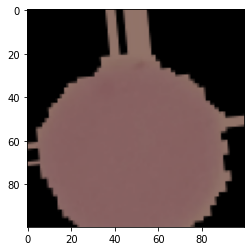

In [8]:
sample = next(train_data_generator)
img = sample[0][0]
label = sample[1][0]
plt.imshow(img)
print(label)

**MODEL**

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
epochs = 15
history = model.fit(
    train_data_generator,
    steps_per_epoch = len(train_data_generator),
    validation_data=validation_data_generator,
    epochs=epochs
)

Epoch 1/15
1378/1378 [==============================] - 148s 98ms/step - loss: 0.4069 - accuracy: 0.8414 - val_loss: 0.3228 - val_accuracy: 0.8947
Epoch 2/15
1378/1378 [==============================] - 137s 99ms/step - loss: 0.2766 - accuracy: 0.9087 - val_loss: 0.2723 - val_accuracy: 0.9058
Epoch 3/15
1378/1378 [==============================] - 130s 95ms/step - loss: 0.2559 - accuracy: 0.9146 - val_loss: 0.2482 - val_accuracy: 0.9125
Epoch 4/15
1378/1378 [==============================] - 130s 95ms/step - loss: 0.2447 - accuracy: 0.9192 - val_loss: 0.2241 - val_accuracy: 0.9169
Epoch 5/15
1378/1378 [==============================] - 133s 97ms/step - loss: 0.2407 - accuracy: 0.9207 - val_loss: 0.2537 - val_accuracy: 0.9114
Epoch 6/15
1378/1378 [==============================] - 135s 98ms/step - loss: 0.2293 - accuracy: 0.9230 - val_loss: 0.2573 - val_accuracy: 0.9123
Epoch 7/15
1378/1378 [==============================] - 135s 98ms/step - loss: 0.2215 - accuracy: 0.9259 - val_loss: 0

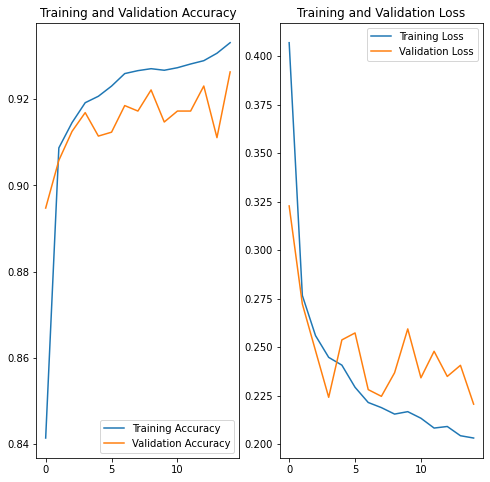

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

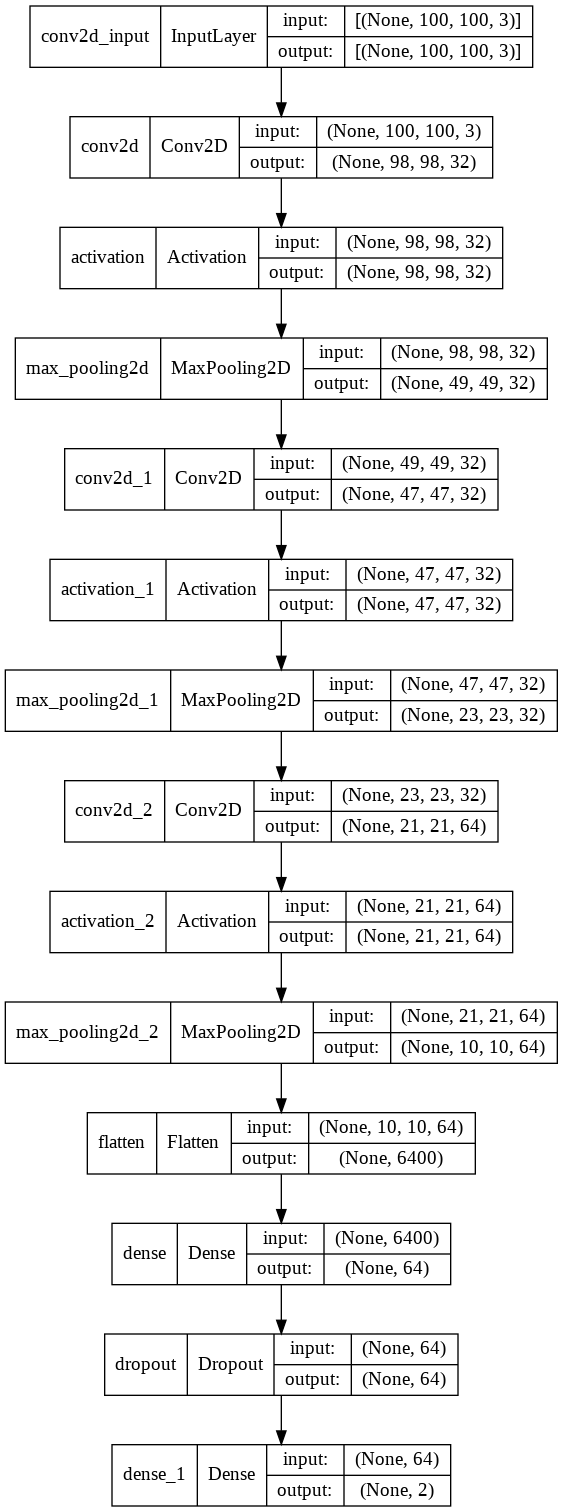

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [25]:
probabilities = model.predict(train_data_generator, 22048)

In [15]:
from keras.metrics import accuracy
print(probabilities.shape)


(22048, 2)


In [16]:
#Saving the model
model.save('CNN.h5')

In [17]:
config = model.get_config()
new_model = keras.Sequential.from_config(config)

In [18]:
new_model = load_model('CNN.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [19]:
#loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
#print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [23]:
img1 = load_img('/content/CE301/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', 
                target_size=(100,100))
img2 = load_img('/content/CE301/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png', 
                target_size=(100,100))

x1 = img_to_array(img1)
x2 = img_to_array(img2)

x1 = x1.reshape((1,) + x1.shape)
x2 = x2.reshape((1,) + x2.shape)

x1 = new_model.predict(x1)
x2 = new_model.predict(x2)


In [24]:
print (x1)
print (x2)

[[1. 0.]]
[[0. 1.]]
